# DEEP LEARNING - CONVOLUTIONAL NEURAL NETWORK

In [1]:
# Mengimpor modul os, re, glob, cv2, dan np
import os, re, glob, cv2, numpy as np


# Membuka direktori folder Dataset dan memasukannya ke variabel dirs
dirs = os.listdir('Dataset/')
# Mendefinisikan label dengan nilai 0
label = 0 
# Membuat suatu wadah berupa list kosong
im_arr = []
lb_arr = []
X = []
y = []

# Membuat loop untuk mendapatkan folder (Normal dan Covid-19) di dalam folder Datasets
for i in dirs:
    # Mendefinisikan count dengan nilai 0
    count = 0 
    # Membuat loop untuk mendapatkan item di dalam folder Normal dan Covid-19
    for pic in glob.glob('Dataset/'+i+'/*'):
        im = cv2.imread(pic) # Membaca file dalam format gambar
        im = cv2.resize(im,(70,70)) # Merubah ukuran gambar menjadi 70x70 pixel
        im = np.array(im) # Merubah format gambar menjadi bentuk array
        count = count + 1 # Menghitung banyak data
        X.append(im) # Memasukkan array yang sudah dibuat ke dalam list X
        y.append(label)  # Label Covid 19 dan Normal
        if(count <= 10): # Sample
            # Membuat dictionary dimana keynya adalah Kategori (Covid-19 dan Normal) dan valuenya array)
            im_arr.append({str(i):im})
    # Menampilkan jumlah gambar dari masing-masing kategori (Covid-19 dan Normal)
    print('Jumlah '+str(i)+' : '+str(count))
    # Menambahkan label dengan 1 setiap kali iterasi
    label =label + 1
    # Memasukkan kategori (Covid-19 dan Normal) ke dalam list lb_arr
    lb_arr.append(i)

# Mengubah tipe data dari list menjadi arrray
X = np.array(X)
y = np.array(y)

Jumlah Covid-19 : 50
Jumlah Normal : 1583


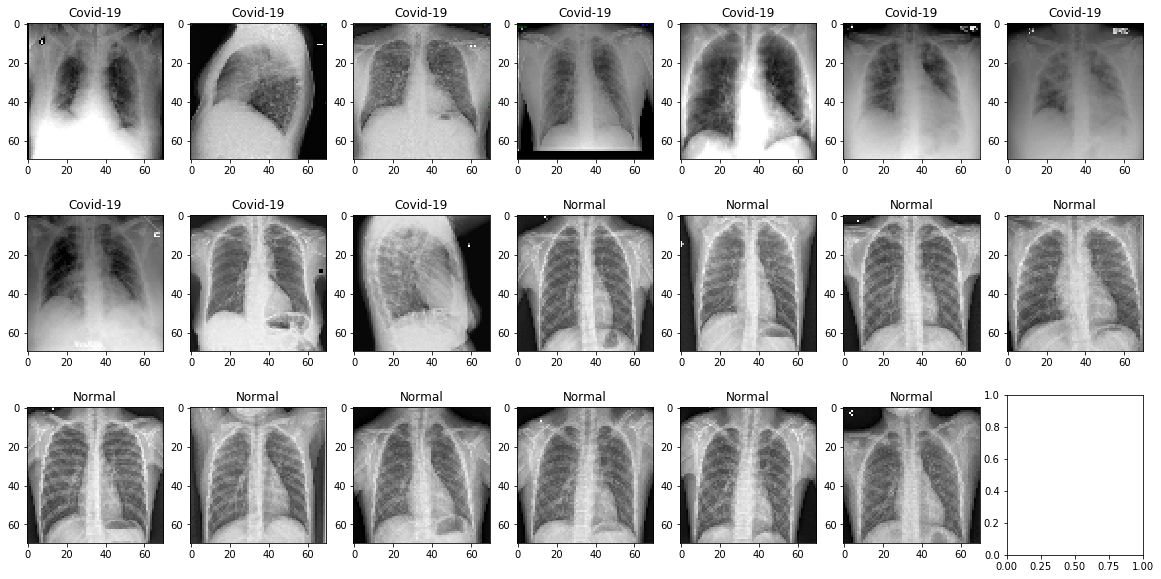

In [2]:
# Mengimpor modul matplotlib.pyplot
import matplotlib.pyplot as plt

# Membuat canvas 
fig, ax = plt.subplots(3,7, figsize=(20,10))
cnt = 0 
row = 0
col = 0

# Membuat loop untuk mendapatkan dictionary pada im_arr
for i in im_arr:
    # Membuat loop untuk mendapatkan kev, value pada dictionary
    for key,value in i.items():
        # Membuat baris baru jika sudah menampilkan 7 gambar adlam 1 baris
        if(cnt==7):
            row =row + 1
            col = 0 
            cnt = 0
        # Menampilkan kumpulan array menjadi sebuah gambar
        ax[row,col].imshow(value)
        # Menampilkan nama kategori (Covid-19 dan Normal) sebagai judul
        ax[row,col].set_title(key)
        # Menghitung gambar yang ditampilkan dalam 1 baris
        cnt = cnt +1
        # Menghitung tiap kolom
        col = col +1

In [3]:
# Mengimpor train_test_split dari modul sklearn
from sklearn.model_selection import train_test_split
# Mengimpor to_categorical dari modul keras
from keras.utils import to_categorical
# Mengimpor classification_report dan confusion_matrix dari modul sklearn
from sklearn.metrics import classification_report,confusion_matrix

# Membagi dataset ke dalam training dan test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Mengubah tipe data ke bilangan bulat
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalisasi min,max 0,255 -> 0,1 
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 2) # Mengubah label ke binary/categorical [1 0 0 0]=0, [0 1 0 0]=1
y_test = to_categorical(y_test, 2)

Using TensorFlow backend.


In [4]:
# Mengimpor modul Sequential dari modul tensorflow
from tensorflow.keras.models import Sequential
# Mengimpor Conv2D, MaxPooling2D, Dropout, Flatten, dan Dense dari modul tensorflow
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Initialising the CNN
model = Sequential() # membuat object sequential class

# Step 1 - Convolution
# Set nilai filter = 32, dimensi filter 3x3, fungsi aktivasinya relu, dan bentuk inputnya dan tipenya RGB
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(70,70,3)))

# Step 2 - Pooling
# Pooling dalam bentuk matrix 2×2 sebagai pixel loss minimum dan precise region dimana feature dialokasikan
model.add(MaxPooling2D(pool_size=(2,2)))
# Adding a second convolutional layer
# Set nilai filter = 32, dimensi filter 3x3, fungsi aktivasinya relu
model.add(Conv2D(32,(3,3), activation='relu'))
# Pooling dalam bentuk matrix 2×2 sebagai pixel loss minimum dan precise region dimana feature dialokasikan
model.add(MaxPooling2D(pool_size=(2,2)))
# Menambah layer dropout untuk mencegah overfitting
model.add(Dropout(0.25))
# Mengonversi array 2 dimensi menjadi 1 dimensi single vector

# Step 3 - Flattening
model.add(Flatten())

# Step 4 - Full connection
# Menambahkan layer yang fully connected, dengan jumlah node di hidden layer sebanyak 128 unit dan fungsi aktivasinya relu
model.add(Dense(128, activation='relu'))
# Menambah layer dropout untuk mencegah overfitting
model.add(Dropout(0.5))
# Menambahkan layer yang fully connected, dengan jumlah node di hidden layer sebanyak 2 unit dan fungsi aktivasinya softmax
model.add(Dense(2, activation='softmax'))

In [5]:
# Mengimpor SGD dari modul tensorflow
from tensorflow.keras.optimizers import SGD

# Optimizer / Update Rule
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)

# Compile the model with Mean Squared Error Loss
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Menampilkan informasi dari model
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [6]:
# Training model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Evaluasi performa
scores = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f%%' %(scores[1]*100))

Epoch 1/25
36/36 [==============================] - 5s 152ms/step - loss: 0.2172 - accuracy: 0.9388 - val_loss: 0.2035 - val_accuracy: 0.9816
Epoch 2/25
36/36 [==============================] - 6s 160ms/step - loss: 0.1820 - accuracy: 0.9641 - val_loss: 0.0801 - val_accuracy: 0.9816
Epoch 3/25
36/36 [==============================] - 5s 150ms/step - loss: 0.1308 - accuracy: 0.9641 - val_loss: 0.0719 - val_accuracy: 0.9816
Epoch 4/25
36/36 [==============================] - 5s 146ms/step - loss: 0.1053 - accuracy: 0.9641 - val_loss: 0.0653 - val_accuracy: 0.9816
Epoch 5/25
36/36 [==============================] - 5s 148ms/step - loss: 0.0825 - accuracy: 0.9659 - val_loss: 0.0413 - val_accuracy: 0.9816
Epoch 6/25
36/36 [==============================] - 5s 151ms/step - loss: 0.0680 - accuracy: 0.9720 - val_loss: 0.0289 - val_accuracy: 0.9898
Epoch 7/25
36/36 [==============================] - 5s 147ms/step - loss: 0.0587 - accuracy: 0.9773 - val_loss: 0.0406 - val_accuracy: 0.9898
Epoch 

In [7]:
y_pred = model.predict(X_test) #Melakukan prediksi
y_predictions = []
y_testons = []


for i in range(0, len(y_pred)):
    max_n = max(y_pred[i])
    max_m = max(y_test[i])
    index_n = [index_n for index_n, j in enumerate(y_pred[i]) if j == max_n]
    index_m = [index_m for index_m, j in enumerate(y_test[i]) if j == max_m]
    y_predictions.append(index_n)
    y_testons.append(index_m)

In [8]:
print(classification_report(y_testons, y_predictions, target_names=['Covid','Normal']))

              precision    recall  f1-score   support

       Covid       0.89      0.89      0.89         9
      Normal       1.00      1.00      1.00       481

    accuracy                           1.00       490
   macro avg       0.94      0.94      0.94       490
weighted avg       1.00      1.00      1.00       490



In [9]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [10]:
y_test_class = np.argmax(y_test, axis=1)

In [11]:
# Mengimpor accuracy_score,roc_auc_score dari modul sklearn
from sklearn.metrics import accuracy_score,roc_auc_score
# Mengimpor modul seaborn
import seaborn as sn 

# Evaluasi performa
print(accuracy_score(y_test_class, y_pred))

confusion_matrix(y_test_class, y_pred)

0.9959183673469387


array([[  8,   1],
       [  1, 480]], dtype=int64)

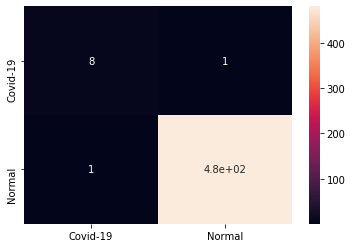

In [12]:
cm = confusion_matrix(y_test_class, y_pred)
sn.heatmap(cm, annot=True, xticklabels=['Covid-19', 'Normal'], yticklabels=['Covid-19','Normal'])

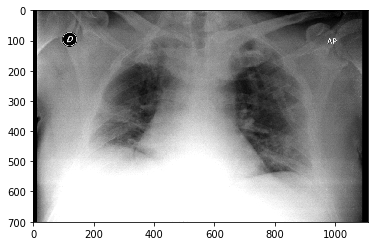

In [13]:
import matplotlib.pyplot as plt
data = plt.imread('Dataset\covid-19\covid-19-caso-111-1-21.png')
plt.imshow(data)
plt.show()